### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-17,464623,5124002,767433,611851,291573,143799,132965,254229,119281,98544,87775,127912,128531,4849,200741
2021-11-18,465082,5132202,768695,612144,291929,143999,133034,255448,119333,98751,87804,127963,128634,4849,200767
2021-11-19,465349,5140519,770691,612370,291929,144158,133082,256669,119383,98993,87810,128013,128734,4849,200801
2021-11-20,465662,5146467,771013,612587,292145,144308,133131,257891,119407,99067,87810,128054,128852,4849,200833
2021-11-21,465911,5150868,771118,612659,292372,144369,133177,259107,119424,99130,87810,128093,128956,4849,200866


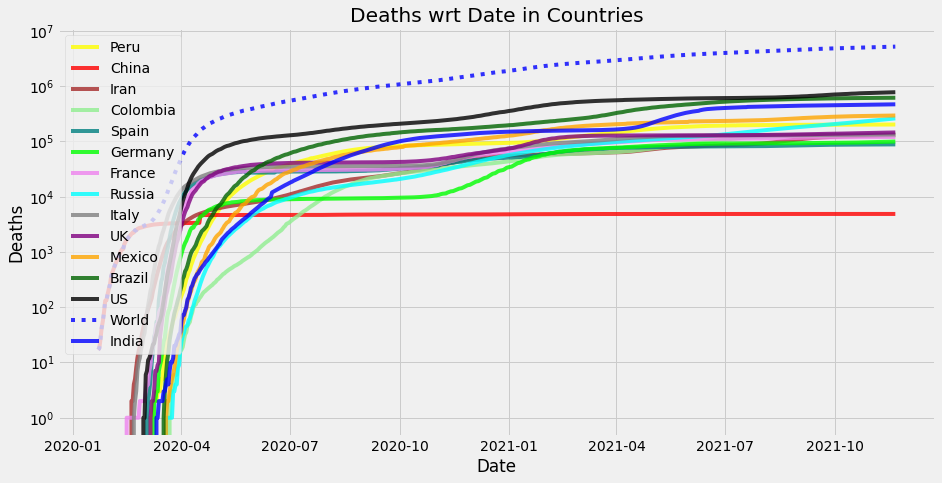

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-17,11919,624866,111404,11977,4571,38254,10167,35415,20365,68366,6667,2257,6251,38,1370
2021-11-18,11106,612610,109578,12301,3915,48053,10645,36155,20396,58768,6315,2121,5882,28,1415
2021-11-19,10302,619373,129060,13355,0,44835,10554,35935,21270,57302,6636,2157,5784,24,1537
2021-11-20,10488,476669,41493,8833,3837,40153,11540,35896,22701,45183,0,2590,3539,20,1725
2021-11-21,8488,387081,28719,5126,3306,39548,9707,35749,19757,26241,0,2649,4340,40,1465


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-17,13033,476521,83426,10700,3283,38235,5991,36252,9298,30696,3128,2003,8613,60,979
2021-11-18,12904,485594,85169,10806,3325,38890,6301,36246,10038,32568,3340,2011,8431,57,1008
2021-11-19,12731,494513,88095,10976,3103,39286,6585,36225,10787,34217,3560,2021,8255,55,1043
2021-11-20,12581,493323,84988,10833,3152,39344,6915,36203,11581,34948,3322,2059,7940,53,1089
2021-11-21,12308,486240,81237,10453,3162,39357,7101,36173,12126,34367,3101,2098,7700,52,1114


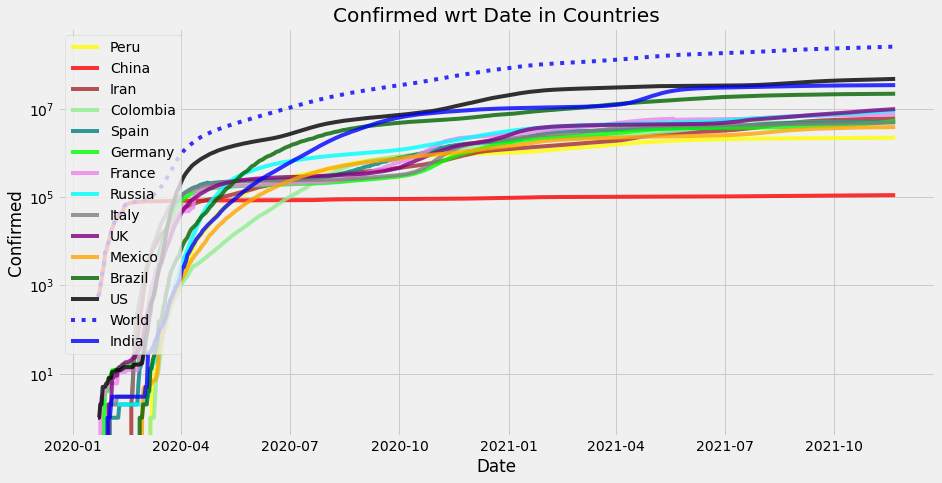

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-17,470,9128,1622,373,369,201,72,1220,56,266,30,47,125,0,46
2021-11-18,459,8200,1262,293,356,200,69,1219,52,207,29,51,103,0,26
2021-11-19,267,8317,1996,226,0,159,48,1221,50,242,6,50,100,0,34
2021-11-20,313,5948,322,217,216,150,49,1222,24,74,0,41,118,0,32
2021-11-21,249,4401,105,72,227,61,46,1216,17,63,0,39,104,0,33


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-17,359.03,7283.14,1201.92,250.66,204.11,155.17,53.83,1179.88,40.09,176.09,24.73,37.09,129.82,0.0,30.74
2021-11-18,371.53,7397.75,1209.43,255.96,223.09,160.77,55.73,1184.77,41.58,179.95,25.26,38.83,126.47,0.0,30.15
2021-11-19,358.46,7512.66,1307.75,252.21,195.21,160.55,54.76,1189.30,42.63,187.71,22.85,40.22,123.16,0.0,30.63
2021-11-20,352.78,7317.07,1184.53,247.81,197.81,159.23,54.04,1193.39,40.30,173.50,20.00,40.32,122.52,0.0,30.80
2021-11-21,339.81,6952.56,1049.59,225.83,201.45,146.95,53.03,1196.22,37.39,159.68,17.50,40.16,120.20,0.0,31.08


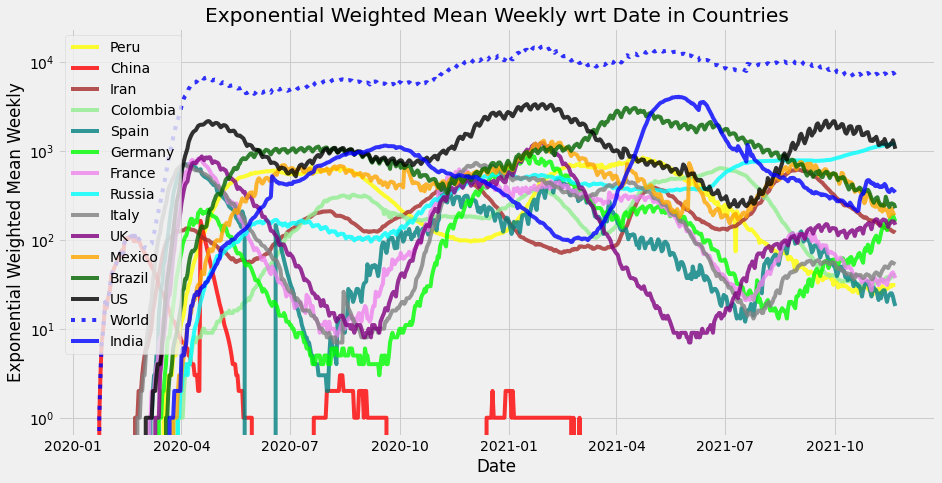

In [18]:
plotter(np.round(AVG), name)

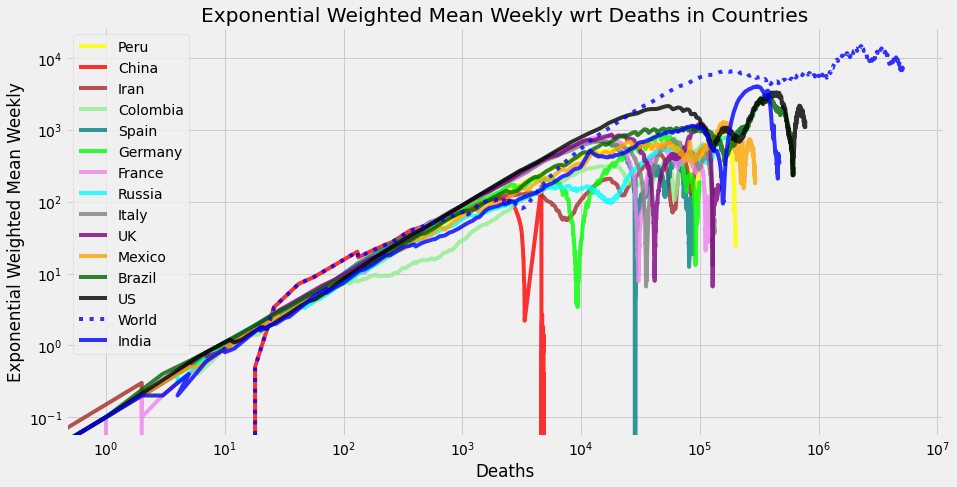

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

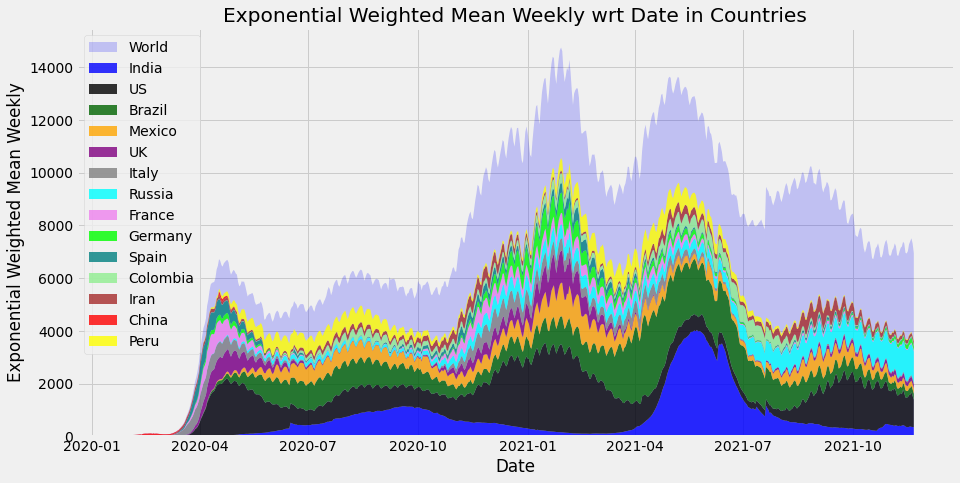

In [20]:
stackplotter(AVG, name)

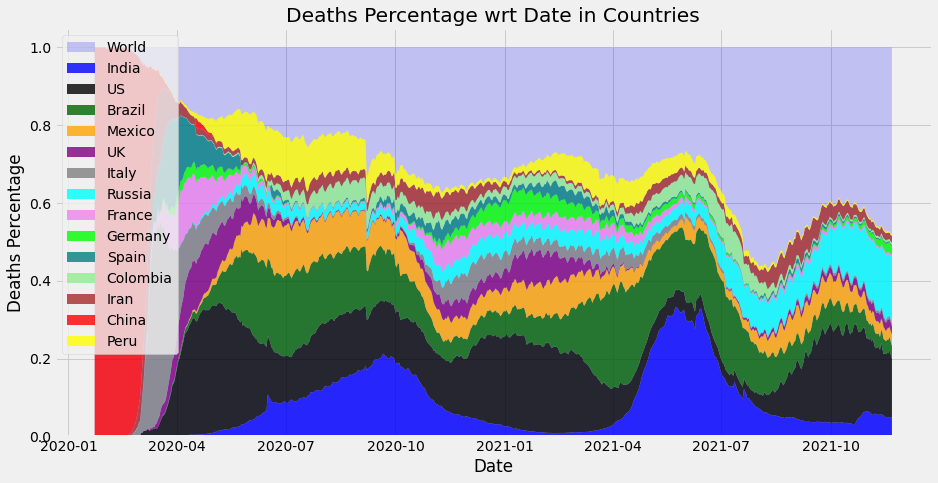

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

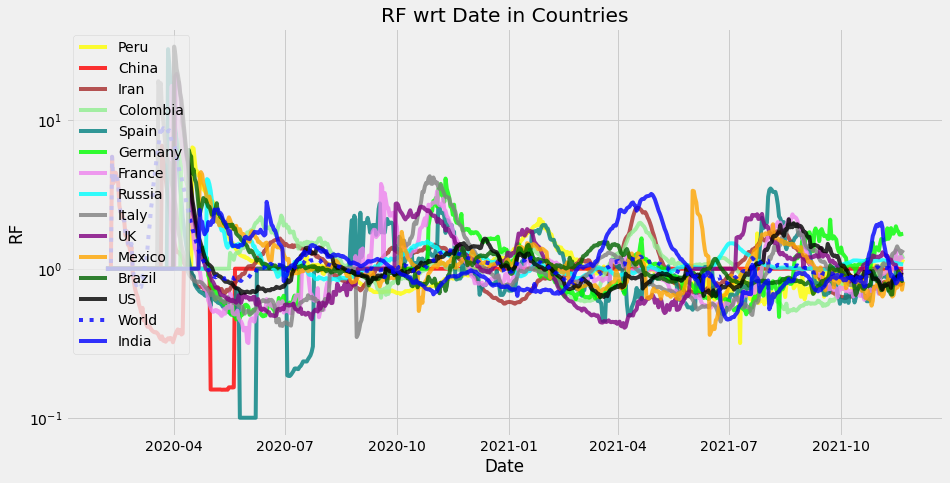

In [23]:
plotter(Reproductivity, 'RF')

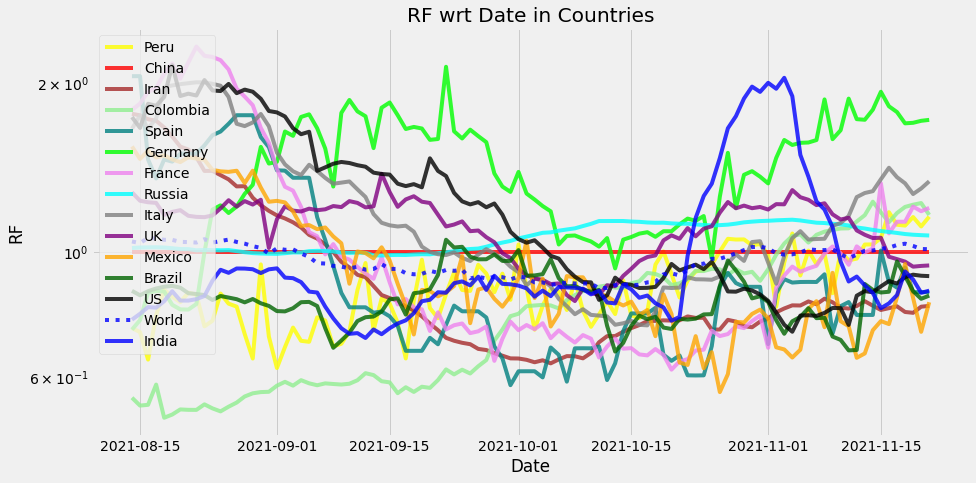

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

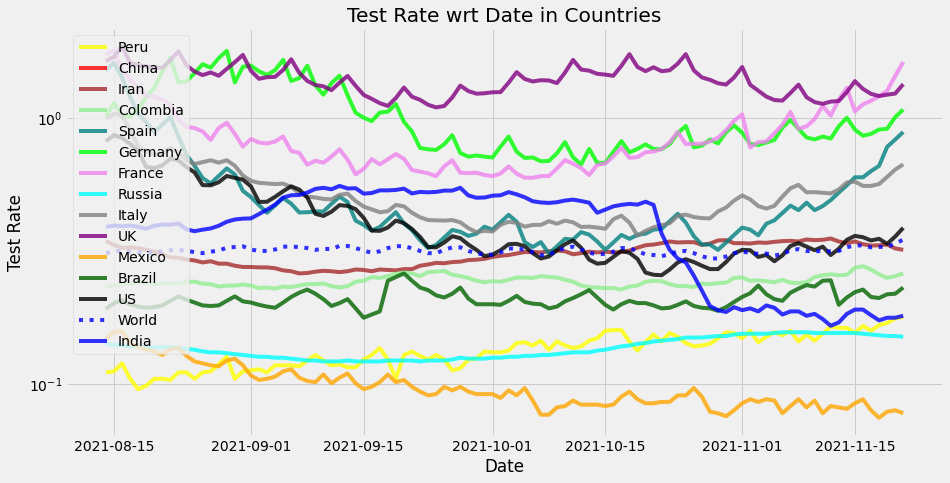

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

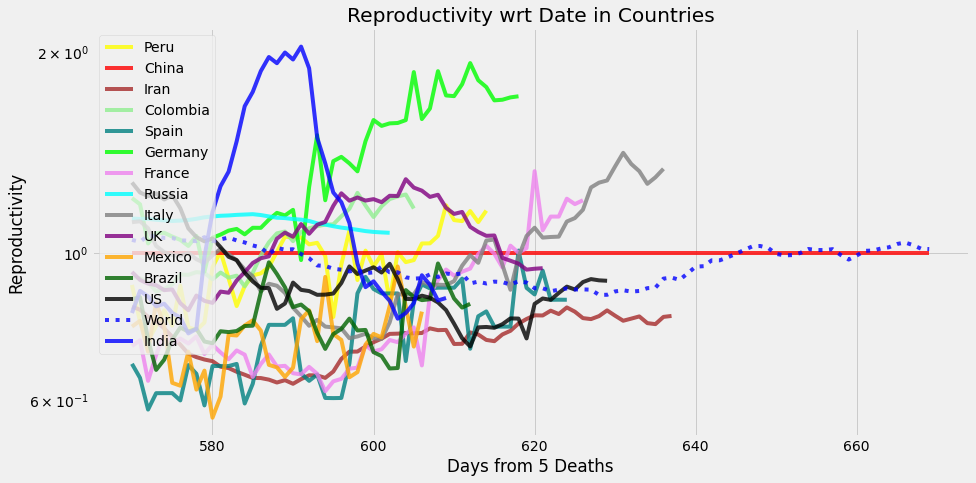

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

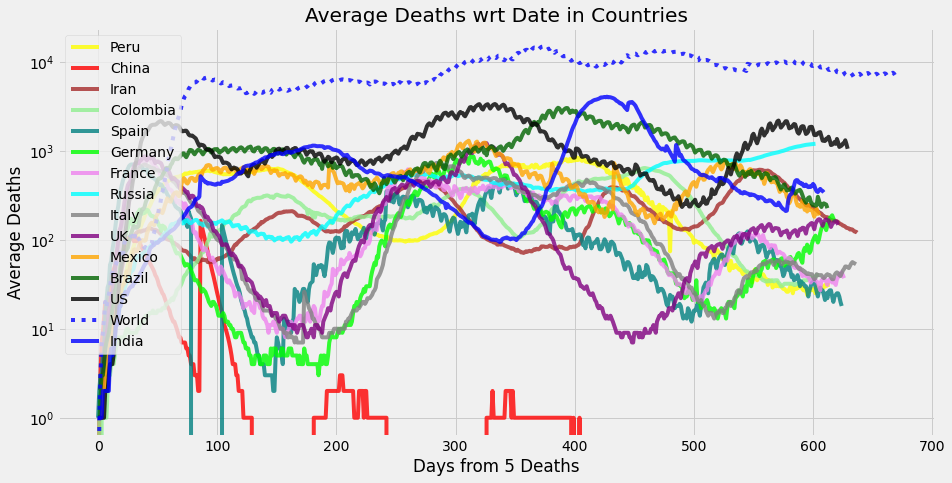

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

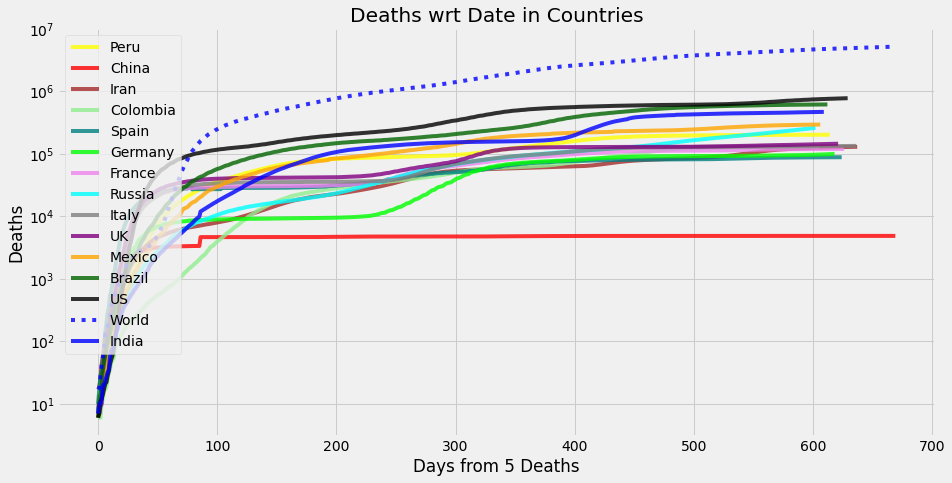

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5150868,4401,7189.71,6952.56,1.0127,257555773,0.350,486240,1030.17
US,771118,105,1122.29,1049.59,0.9075,47730591,0.387,81237,154.22
Brazil,612659,72,196.57,225.83,0.8380,22017276,0.231,10453,122.53
India,465911,249,322.29,339.81,0.8551,34518901,0.181,12308,93.18
Mexico,292372,227,183.29,201.45,0.8157,3862137,0.078,3162,58.47
Russia,259107,1216,1214.00,1196.22,1.0712,9170898,0.151,36173,51.82
Peru,200866,33,33.00,31.08,1.1567,2224344,0.179,1114,40.17
UK,144369,61,147.43,146.95,0.9479,9897206,1.339,39357,28.87
Indonesia,143739,11,11.43,14.57,0.5863,4253412,0.212,619,28.75


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5150868,4401,7189.71,6952.56,1.0127,257555773,0.350,486240,1030.17
Russia,259107,1216,1214.00,1196.22,1.0712,9170898,0.151,36173,51.82
US,771118,105,1122.29,1049.59,0.9075,47730591,0.387,81237,154.22
Ukraine,86260,413,682.57,659.60,1.0972,3493203,0.148,19485,17.25
India,465911,249,322.29,339.81,0.8551,34518901,0.181,12308,93.18
Poland,80822,41,279.29,221.07,2.3488,3345388,0.319,14093,16.16
Romania,54959,121,270.00,295.78,0.7129,1762701,0.108,6373,10.99
Turkey,75042,195,215.86,210.39,0.9888,8573524,0.602,25325,15.01
Philippines,47074,171,213.29,205.42,1.0996,2826410,0.075,3073,9.41


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5150868


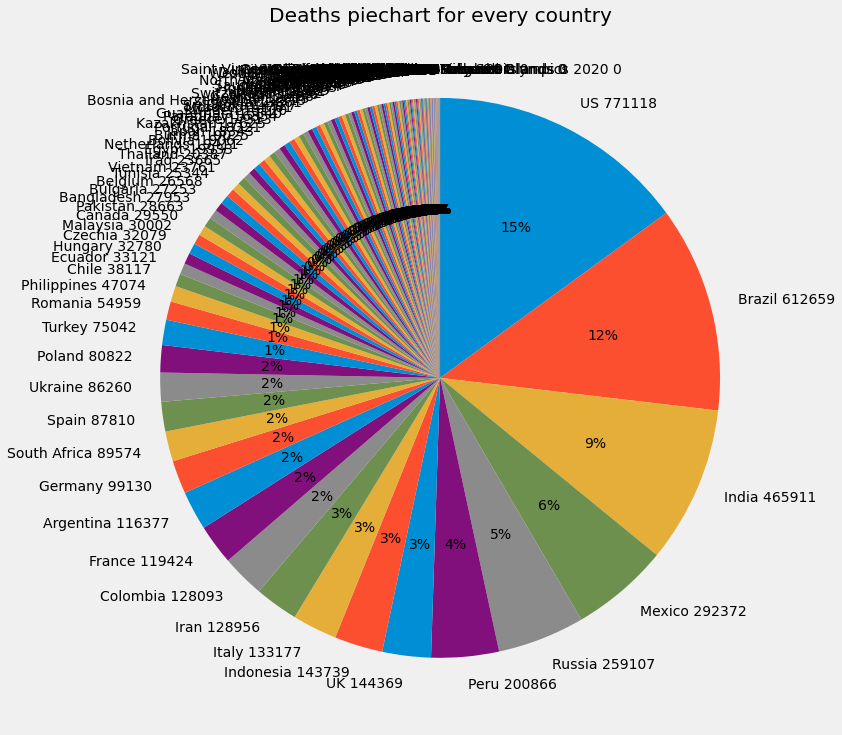

In [35]:
piechart('Deaths')

World total:  7189


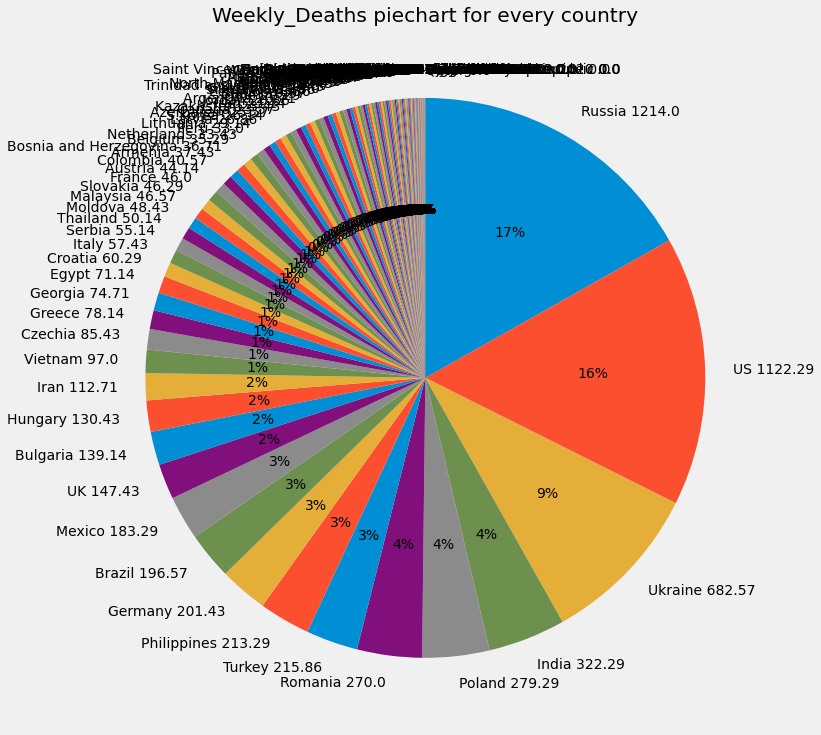

In [36]:
piechart('Weekly_Deaths')

World total:  4401


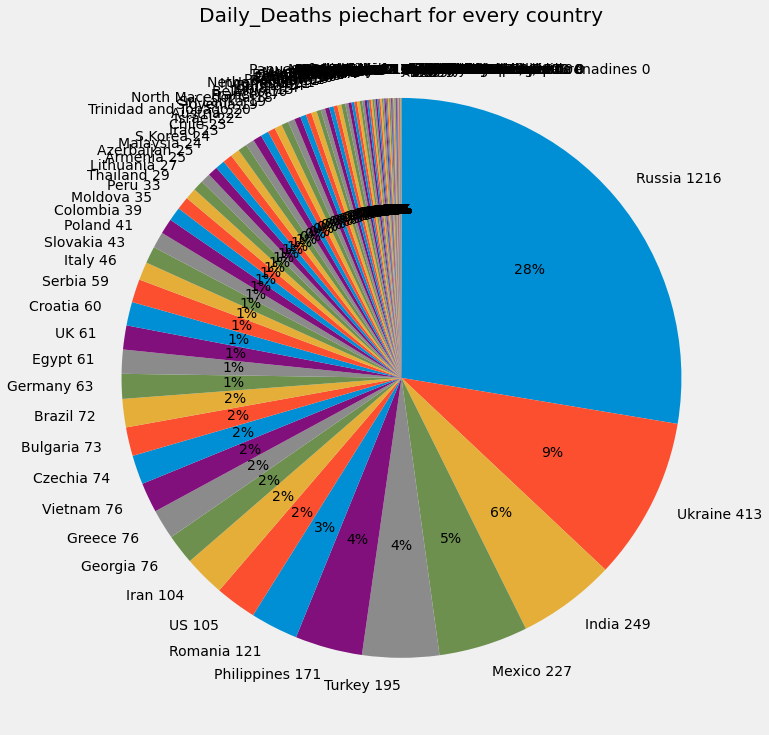

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-11-22


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1030173600.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master cdb67c8] `date` update
 1 file changed, 1562 insertions(+), 2132 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (75%)


To https://github.com/Arrowheadahp/COVID-19.git
   18163d1..cdb67c8  master -> master
